In [107]:
import pandas as pd
import seaborn as sns

In [108]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [109]:
imre = pd.read_csv('ARISML.csv', index_col = 'ts')
luca = pd.read_csv('recording_luca.csv', index_col = 'ts')
imre.shape
luca.shape

(15007, 27)

In [110]:
combined = pd.concat([luca,imre]).drop_duplicates().reset_index()

In [111]:
combined = combined.set_index('ts').sort_index().reset_index()
combined = combined[combined['ts'] > 0]
combined['Origin'] = 0

In [112]:
origin_imre = combined.merge(imre)['ts'].values

In [113]:
def set_origin(row):
    return 'Imre' if row['ts'] in origin_imre else 'Luca'

In [114]:
combined['Origin'] = combined.apply(set_origin, axis = 1)

In [115]:
t0 = 2528 # time of ignition [s]
duration = 36 # flight duration [s]
combined['Time [s]'] = (combined['ts'])/1000 - t0
combined['Altitude [m]'] = combined['altitude']/1000
combined['Velocity [m/s]'] = combined['velocity']/1000
combined['Battery [V]'] = combined['battery_battery']/1000
combined['Pressure [kPa]'] = combined['sb_data_pressure']/1000

In [116]:
dim3 = lambda x : [x + '_' + s for s in ['x', 'y', 'z']]

In [117]:
combined.set_index('ts').to_csv('maiden_launch_combined_telemetry.csv')

In [118]:
#convert to gs
fmt_acc = lambda x: x / 1024
#convert to degrees per second
fmt_gyro = lambda x: x / 16.4

combined[dim3('Acceleration')] = combined[dim3('sb_data_acc')].apply(pd.to_numeric).apply(fmt_acc)
combined[dim3('Gyro')] = combined[dim3('sb_data_gyro')].apply(pd.to_numeric).apply(fmt_gyro)

(0, 36)

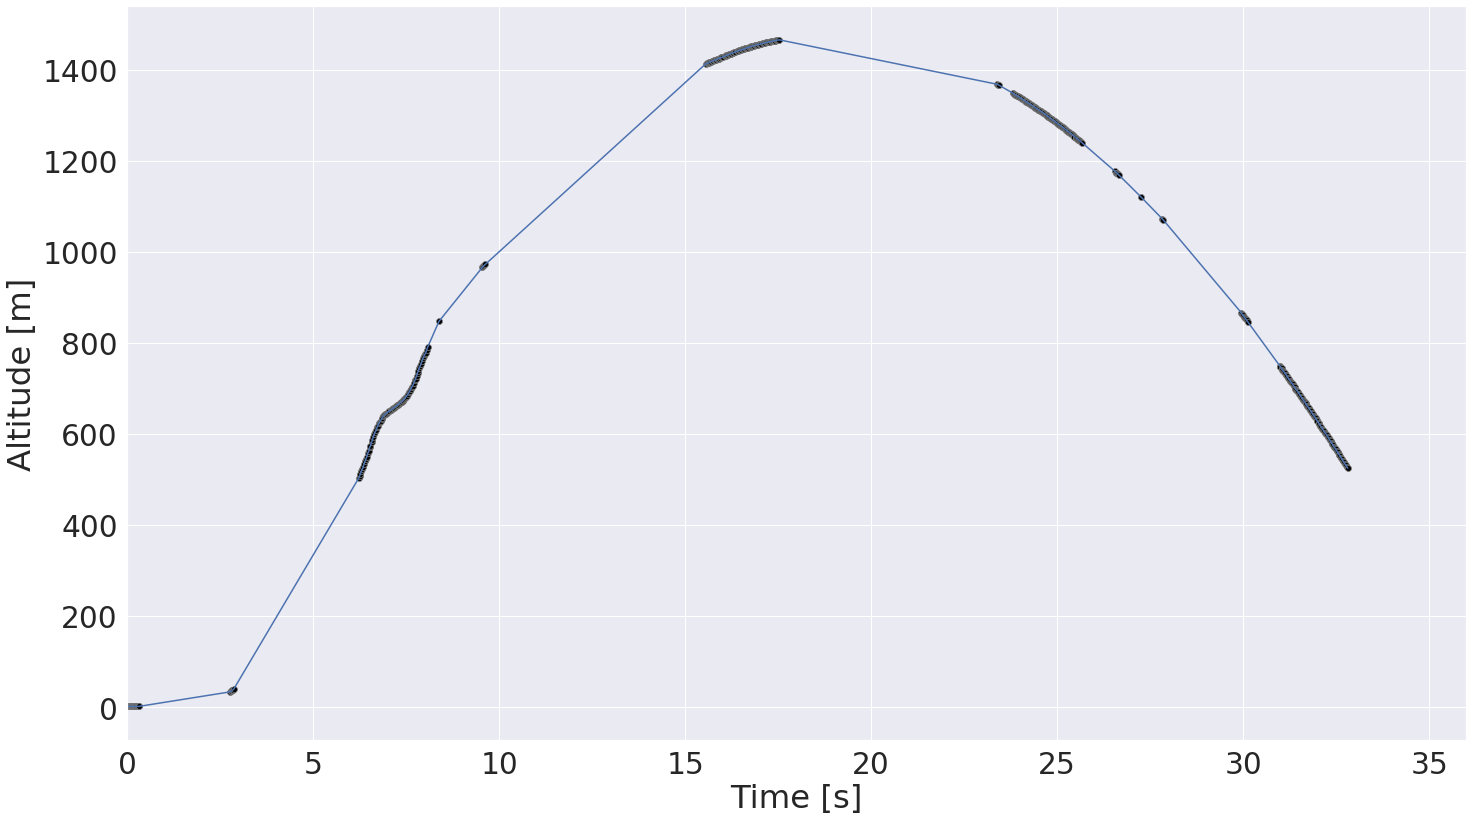

In [119]:
plt = sns.scatterplot(data = combined, x = 'Time [s]', y = 'Altitude [m]', color = 'black', edgecolor='gray')#, hue = 'Origin', s=150)
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Altitude [m]')
plt.set_ylabel('Altitude [m]')
plt.set_xlabel('Time [s]')
plt.set_xlim(0, duration)

(0, 36)

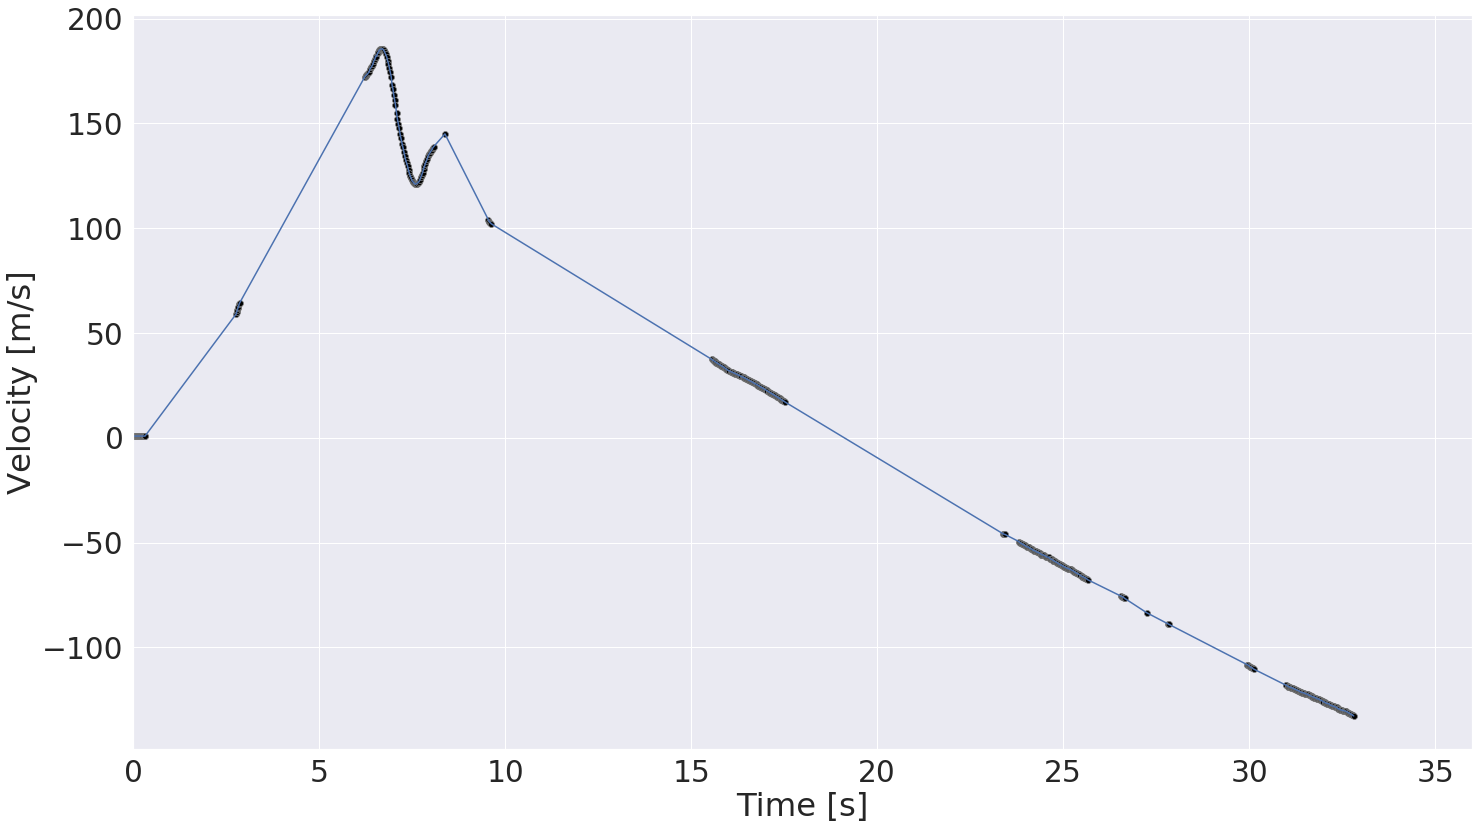

In [120]:
plt = sns.scatterplot(data = combined, x = 'Time [s]', y = 'Velocity [m/s]', color = 'black', edgecolor='gray')#, hue = 'Origin', s=150)
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Velocity [m/s]')
plt.set_ylabel('Velocity [m/s]')
plt.set_xlabel('Time [s]')
plt.set_xlim(0, duration)

(0, 36)

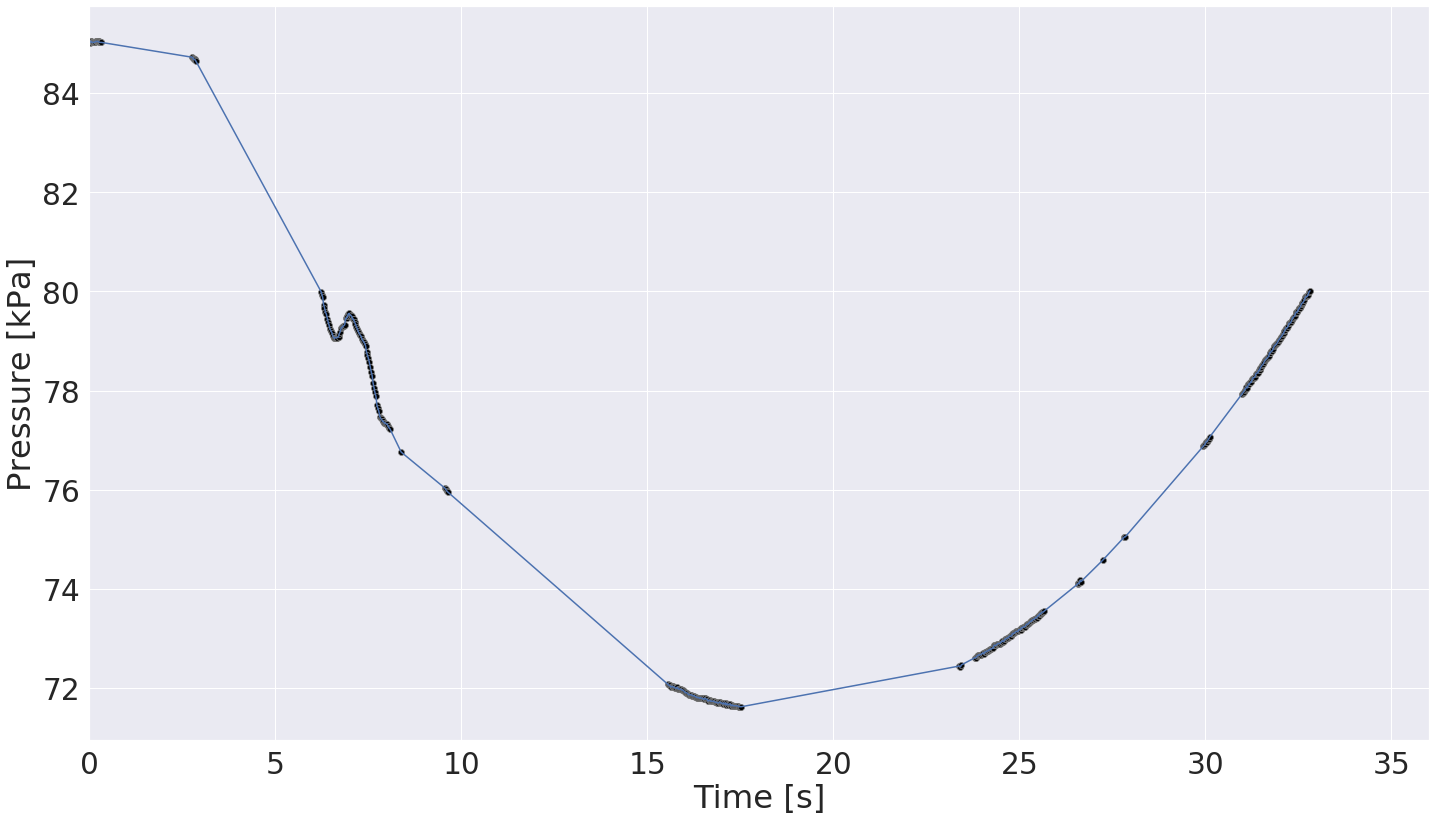

In [121]:
plt = sns.scatterplot(data = combined.reset_index(), x = 'Time [s]', y = 'Pressure [kPa]', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = combined.reset_index(), x = 'Time [s]', y = 'Pressure [kPa]')
plt.set_ylabel('Pressure [kPa]')
plt.set_xlabel('Time [s]')
plt.set_xlim(0, duration)

(0, 36)

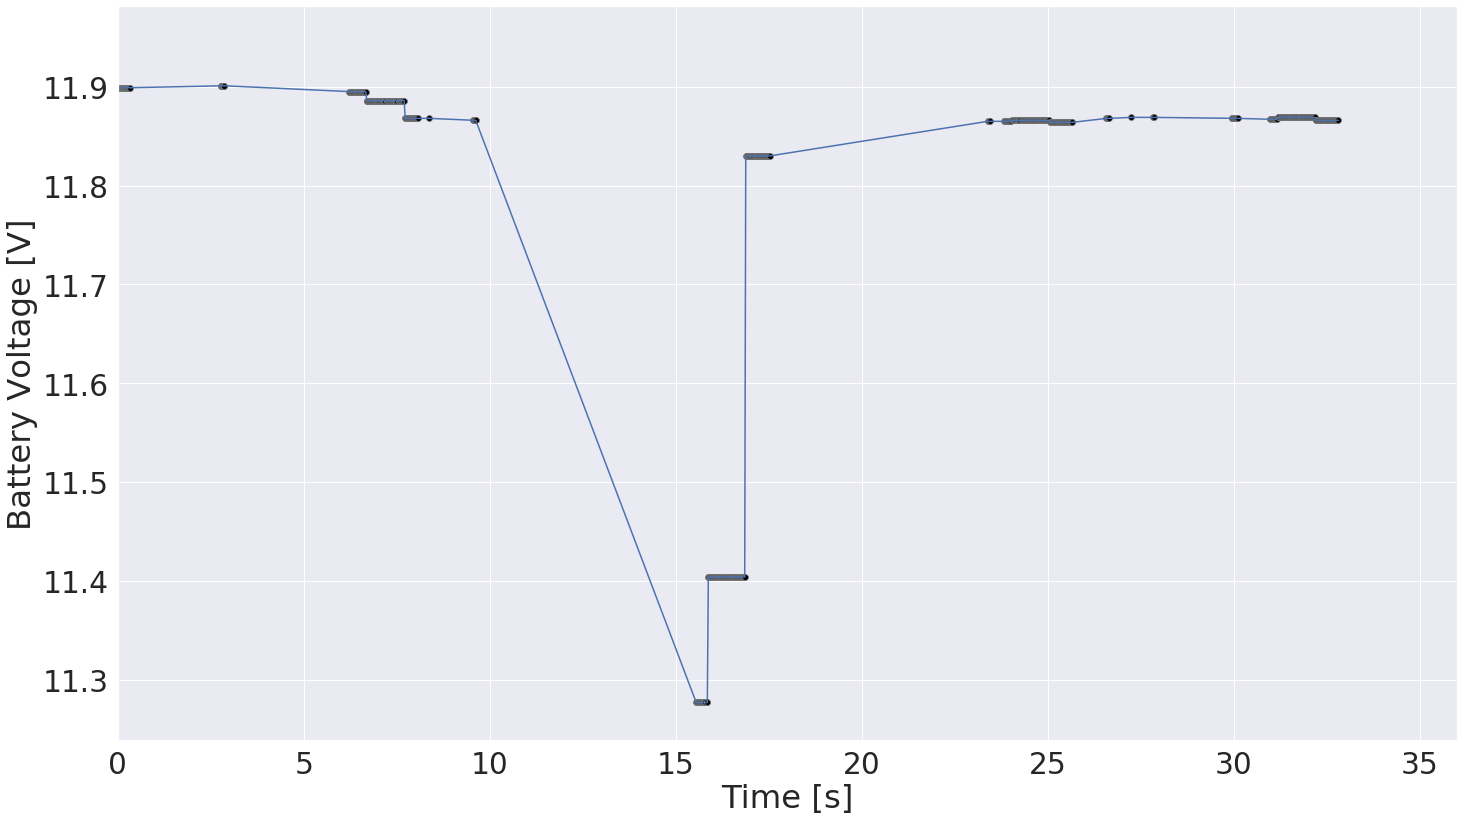

In [122]:
plt = sns.scatterplot(data = combined, x = 'Time [s]', y = 'Battery [V]', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Battery [V]')
plt.set_ylabel('Battery Voltage [V]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-1, 2)
plt.set_xlim(0, duration)

In [123]:
imu_log = combined.reset_index()
imu_log.index.rename('Log Entry', inplace = True)
imu_log = imu_log.reset_index()
imu_log.head()

,Log Entry,index,ts,sb_data_pressure,sb_data_temp,sb_data_gyro_x,sb_data_gyro_y,sb_data_gyro_z,sb_data_acc_x,sb_data_acc_y,...,Altitude [m],Velocity [m/s],Battery [V],Pressure [kPa],Acceleration_x,Acceleration_y,Acceleration_z,Gyro_x,Gyro_y,Gyro_z
0,0,1,1065200,85044,2972,7,-11,-17,-19,21,...,1.515,0.817,11.941,85.044,-0.018555,0.020508,1.029297,0.426829,-0.670732,-1.036585
1,1,2,1065300,85025,2972,8,-10,-10,-18,22,...,1.493,0.810,11.941,85.025,-0.017578,0.021484,1.031250,0.487805,-0.609756,-0.609756
2,2,3,1065400,85044,2972,9,-9,-24,-16,24,...,1.494,0.813,11.941,85.044,-0.015625,0.023438,1.030273,0.548780,-0.548780,-1.463415
3,3,4,1065500,85025,2972,10,-10,-22,-14,20,...,1.497,0.814,11.941,85.025,-0.013672,0.019531,1.033203,0.609756,-0.609756,-1.341463
4,4,5,1065600,85044,2972,8,-9,-17,-17,18,...,1.477,0.809,11.941,85.044,-0.016602,0.017578,1.032227,0.487805,-0.548780,-1.036585


In [124]:
imu_log_long = pd.wide_to_long(imu_log, stubnames=['Acceleration', 'Gyro'], i = 'Log Entry', j='Axis', sep='_', suffix='\w')
imu_log_long['Axis'] = imu_log_long.index.get_level_values(1)
imu_log_long.head()

,,sb_data_gyro_y,battery_battery,gps_lat_decimal,gps_fix,Origin,index,sb_data_acc_y,gps_lon_deg,flight_phase,Velocity [m/s],...,Altitude [m],altitude,sb_data_gyro_z,battery_consumption,gps_satellite,cs,sb_data_gyro_x,Acceleration,Gyro,Axis
Log Entry,Axis,,,,,,,,,,,,,,,,,,,,,
0,x,-11,11941,9047751,2,Luca,1,21,8,1,0.817,...,1.515,1515,-17,96,12,31,7,-0.018555,0.426829,x
1,x,-10,11941,9047751,2,Luca,2,22,8,1,0.810,...,1.493,1493,-10,96,12,221,8,-0.017578,0.487805,x
2,x,-9,11941,9047751,2,Luca,3,24,8,1,0.813,...,1.494,1494,-24,96,12,107,9,-0.015625,0.548780,x
3,x,-10,11941,9047751,2,Luca,4,20,8,1,0.814,...,1.497,1497,-22,96,12,18,10,-0.013672,0.609756,x
4,x,-9,11941,9047751,2,Luca,5,18,8,1,0.809,...,1.477,1477,-17,96,12,182,8,-0.016602,0.487805,x


(0, 36)

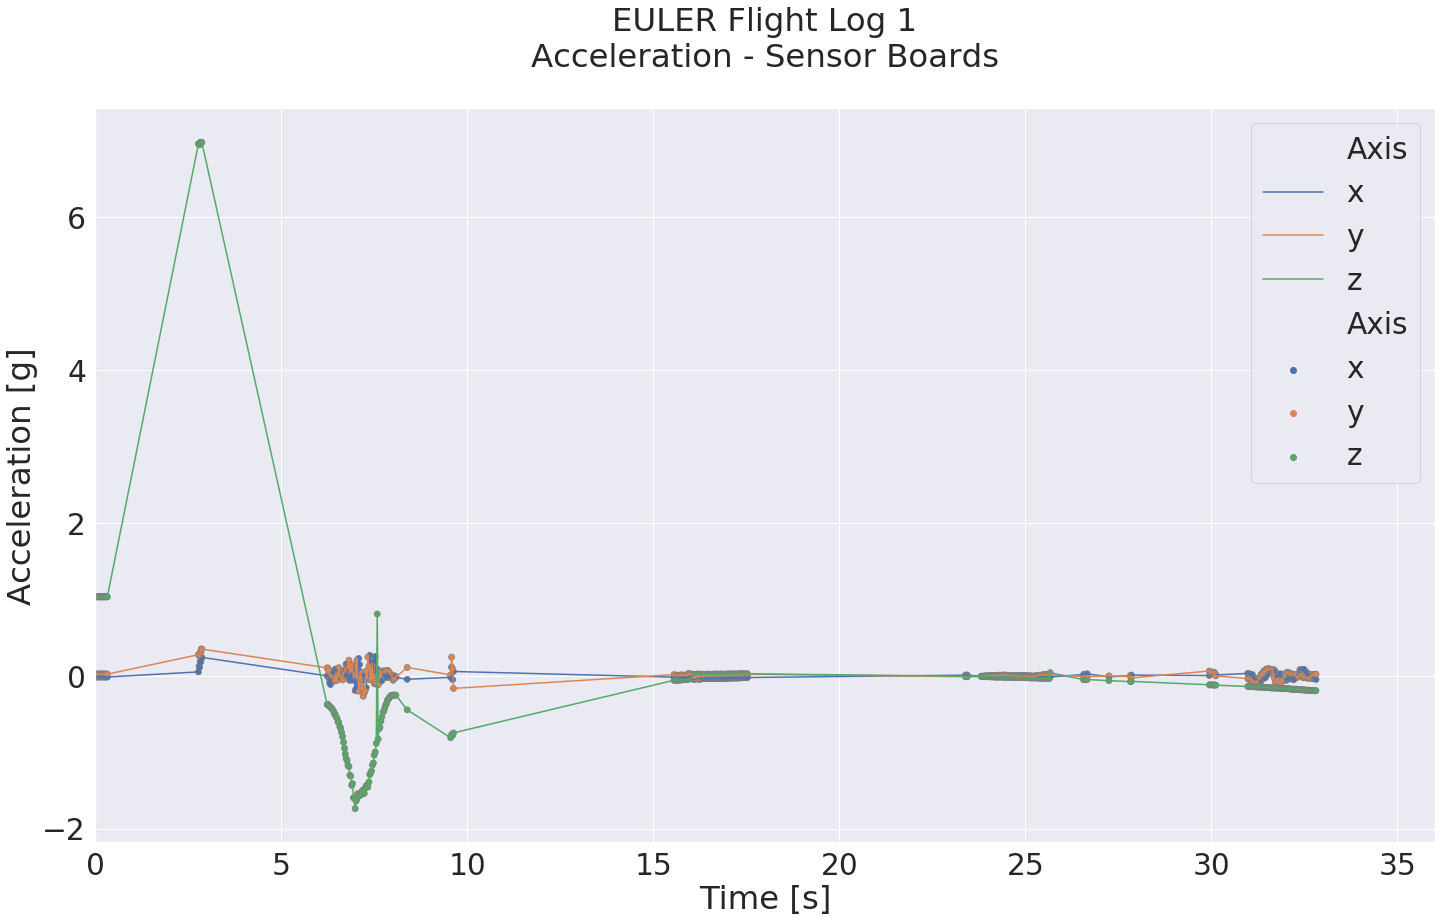

In [125]:
plt = sns.scatterplot(data = imu_log_long, x = 'Time [s]', y = 'Acceleration', hue = 'Axis', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = imu_log_long, x = 'Time [s]', y = 'Acceleration', hue = 'Axis')
plt.set_title(f'EULER Flight Log 1\nAcceleration - Sensor Boards\n')
plt.set_ylabel('Acceleration [g]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-1, 2)
plt.set_xlim(0, duration)

(0, 36)

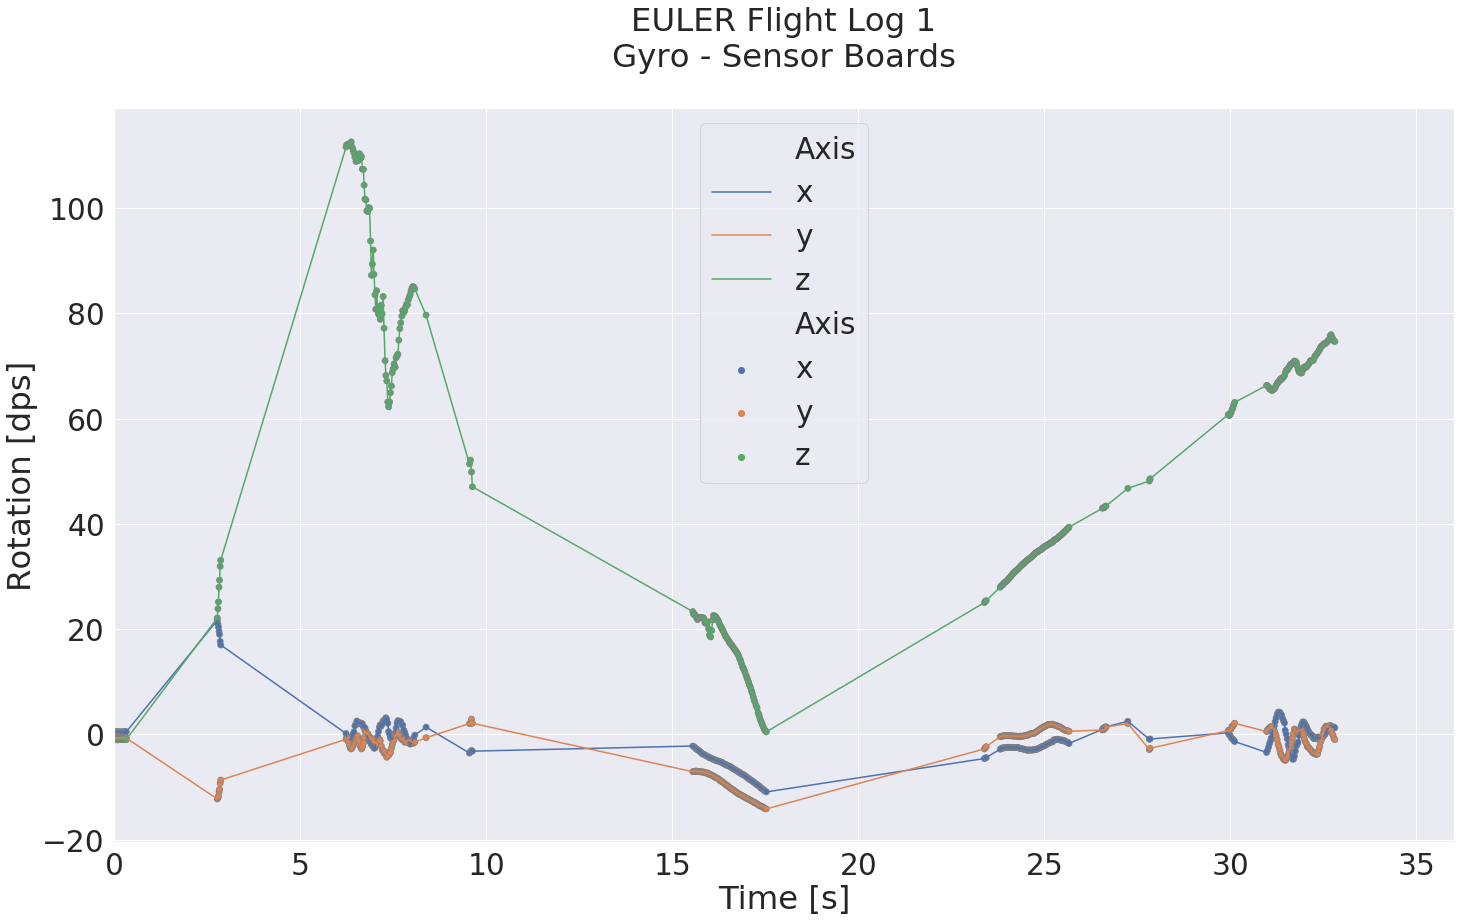

In [126]:
plt = sns.scatterplot(data = imu_log_long, x = 'Time [s]', y = 'Gyro', hue = 'Axis', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = imu_log_long, x = 'Time [s]', y = 'Gyro', hue = 'Axis')
plt.set_title(f'EULER Flight Log 1\nGyro - Sensor Boards\n')
plt.set_ylabel('Rotation [dps]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-1, 2)
plt.set_xlim(0, duration)